# Ronchigram ported from BASIC

**Scott Prahl**

**Dec 2025**

This notebook is only of historical interest but might be of help to someone trying
to write their first ronchigram program.

From the April 1991 issue of *Sky and Telescope*, page 419, has code written in BASIC that creates 
a ronchigram for a parabolic mirror.

https://skyandtelescope.org/astronomy-resources/basic-programs-from-sky-telescope/

In [1]:
%config InlineBackend.figure_format = 'retina'

import sys
import time
import numpy as np
import matplotlib.pyplot as plt

if sys.platform == "emscripten":
    import piplite

    await piplite.install("lenstest")

import lenstest

## Original Source

Here is a listing of the original basic program.  It is only 51 lines long and was pretty easy to port
to python.

.. code-block:: vb.net

    10 REM       RONCHI.BAS
    20 REM
    30 INPUT "Mirror diameter    ";D
    40 INPUT "Radius of curvature";R
    50 INPUT "Grating frequency  ";F
    60 PRINT "Grating distance Delta"
    70 PRINT "  from the mirror's 
    80 PRINT "  center of curvature"
    90 INPUT "  (+ is outside)   ";DL
    100 W=1/(2*F): REM  Line width
    120 CLS
    130 SCREEN 2
    140 X0=300: Y0=100: C=300
    150 K=.42
    160 CIRCLE (X0,Y0),C/2
    170 FOR I=1 TO 10000
    180 X=D*(RND(1)-.5)
    190 Y=D*(RND(1)-.5)
    200 REM   X and Y are the ray's
    210 REM   coordinates on the face
    220 REM   of the mirror
    230 S2=X*X+Y*Y
    240 IF SQR(S2)>D/2 THEN 390
    250 Z=R+S2/R
    260 L=R+DL-Z
    270 U=L*X/Z
    280 REM   Now, test to see if the
    290 REM   ray is blocked (FL=0)
    300 REM   or transmitted (FL=1)
    310 REM   by the grating
    320   FL=0: REM  Reset flag
    330   T=INT(ABS(U/W)+.5)
    340   IF T/2=INT(T/2) THEN FL=1
    350   IF FL=0 THEN 390
    360 XP=X0+X*C/D
    370 YP=Y0+Y*K*C/D
    380 PSET(XP,YP): REM  Plot point
    390 NEXT I
    400 LOCATE 1,1
    410   PRINT "Diameter =   ";D
    420 LOCATE 2,1
    430   PRINT "R of C =     ";R
    440 LOCATE 3,1
    450   PRINT "Ronchi freq =";F
    460 LOCATE 4,1
    470   PRINT "Delta =      ";DL
    480 END
    490 REM ************************************
    500 REM   APPEARED IN ASTRONOMICAL COMPUTING
    510 REM   SKY & TELESCOPE - APRIL 1991 ISSUE
    520 REM ************************************
```

## First translation of the BASIC program

This version is slow.

           Diameter  10.00 in
Radius of Curvature 160.00 in
              Delta  -0.62 in
       Focal Length  80.00 in
                 F#   8.00
        Ronchi freq 100.00 lines per in



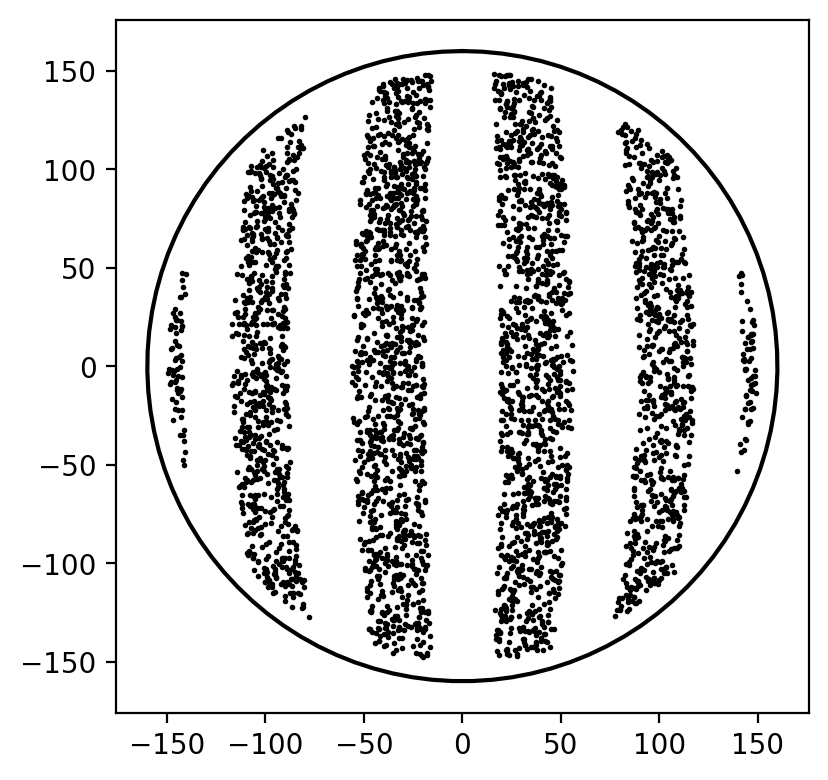

elapsed time = 712 ms


In [2]:
start = time.time()

Fnumber = 4
D = 10  # inches mirror diameter
F = 100  # lines per inch (grating frequency)
DL = -0.62  # Grating to mirrors center
R = 160  # inches

W = 1 / (2 * F)  # lines per inch

X0 = 0
Y0 = 0
C = 300
K = 0.42
Rsqr = (D / 2) ** 2
K = 1

print("           Diameter %6.2f in" % D)
print("Radius of Curvature %6.2f in" % R)
print("              Delta %6.2f in" % DL)
print("       Focal Length %6.2f in" % (R / 2))
print("                 F# %6.2f" % (R / 2 / D))
print("        Ronchi freq %6.2f lines per in" % F)
print()

lenstest.lenstest.draw_circle(R, X0, Y0)

for i in range(10000):
    # X,Y are coordinates on the face of the mirror
    X = D * (np.random.random() - 0.5)
    Y = D * (np.random.random() - 0.5)
    S2 = X * X + Y * Y
    if S2 <= Rsqr:
        Z = R + S2 / R
        L = R + DL - Z
        U = L * X / Z

        # Now, test to see if the ray is blocked (FL=0) or transmitted (FL=1) by the grating
        T = int(abs(U / W) + 0.5)
        if T % 2 > 0:
            XP = X0 + X * C / D
            YP = Y0 + Y * K * C / D
            plt.plot([XP], [YP], "o", markersize=1, color="black")

plt.gca().set_aspect("equal")
plt.show()
end = time.time()
print("elapsed time = %.0f ms" % (1000 * (end - start)))

## Revised version without loops

This version is some 30X faster and does 10X more points.

           Diameter  10.00 in
Radius of Curvature 160.00 in
              Delta  -0.62 in
       Focal Length  80.00 in
                 F#   8.00
        Ronchi freq 100.00 lines per in



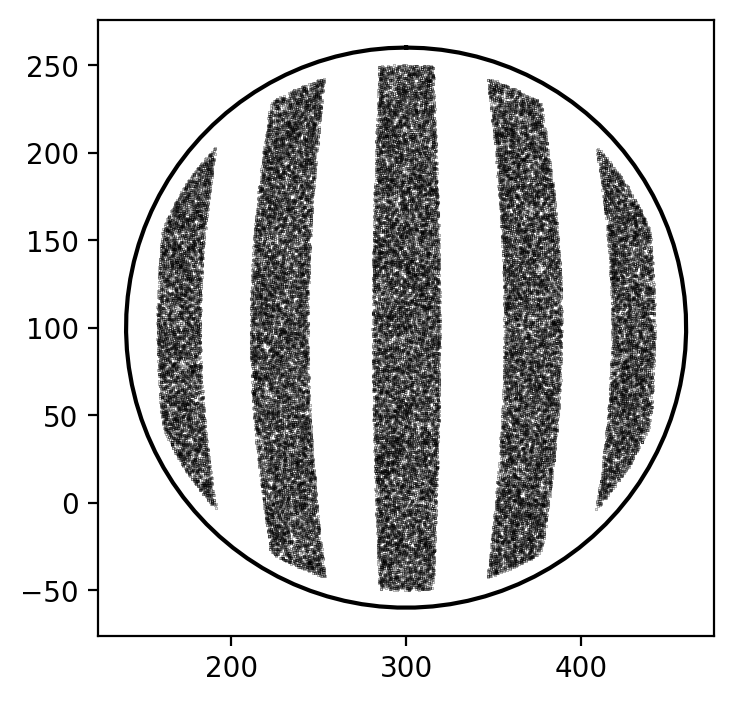

elapsed time = 74 ms


In [3]:
start = time.time()

Fnumber = 4
D = 10  # inches mirror diameter
F = 100  # lines per inch (grating frequency)
DL = -0.62  # Grating to mirrors center
R = 160  # inches

W = 1 / (2 * F)  # lines per inch

npoints = 100000
X0 = 300
Y0 = 100
C = 300
K = 0.42

K = 1

print("           Diameter %6.2f in" % D)
print("Radius of Curvature %6.2f in" % R)
print("              Delta %6.2f in" % DL)
print("       Focal Length %6.2f in" % (R / 2))
print("                 F# %6.2f" % (R / 2 / D))
print("        Ronchi freq %6.2f lines per in" % F)
print()


plt.subplots(1, 1, figsize=(6, 4))
plt.subplot(1, 1, 1)
lenstest.lenstest.draw_circle(R, X0, Y0)

U1 = np.random.uniform(size=npoints)
U2 = np.random.uniform(size=npoints)
X = D / 2 * np.sqrt(U2) * np.cos(2 * np.pi * U1)
Y = D / 2 * np.sqrt(U2) * np.sin(2 * np.pi * U1)

Z = R + (X**2 + Y**2) / R

U = (R + DL) * X / Z - X

T = (np.abs(U / W) + 0.5).astype(int)
Tmask = T % 2 == 1
XP = X0 + X * C / D
YP = Y0 + Y * K * C / D

xp_mask = np.ma.masked_where(Tmask, XP)
yp_mask = np.ma.masked_where(Tmask, YP)

plt.plot(xp_mask, yp_mask, "o", markersize=0.1, color="black")

plt.gca().set_aspect("equal")
plt.show()
end = time.time()
print("elapsed time = %.0f ms" % (1000 * (end - start)))

## version in the `lenstest` library

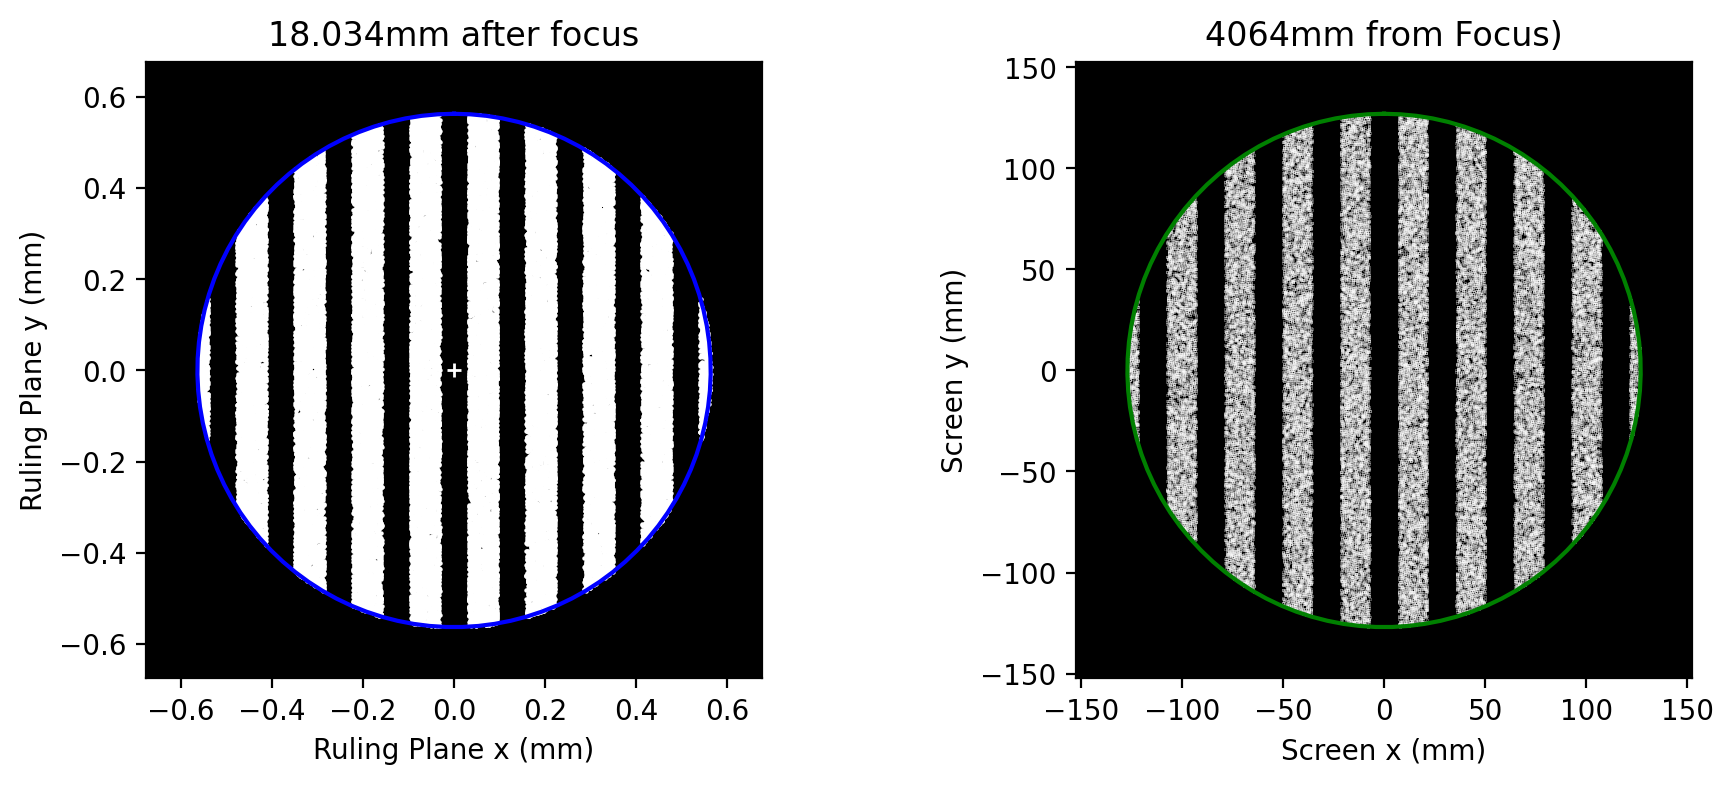

In [4]:
F = 100  # grating frequency in [lines/inch]
conic = 0  # spherical
D = 10 * 25.4  # mirror diameter [mm]
z_offset = 0.71 * 25.4  # Ronchi location relative to focus [mm}
RoC = 160 * 25.4  # mm
lp_per_mm = 100 / 25.4  # line pairs per mi

fig, ax = lenstest.ronchi.plot_ruling_and_screen(D, RoC, lp_per_mm, z_offset, conic)
fig.set_size_inches(11, 4)

plt.show()